<a href="https://colab.research.google.com/github/sneha1012/MultiModal-Genesis/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Adjusted paths to image folders
image_folders = ["/content/drive/MyDrive/ChestXray/images_001/images",
                 "/content/drive/MyDrive/ChestXray/images_002/images"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


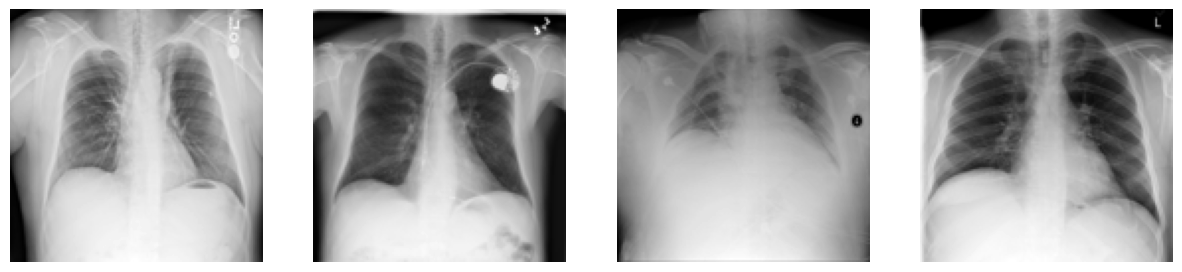

In [14]:
def resize_image(img, target_size):
    """
    Resize the image to target size, maintaining the aspect ratio and padding with black color if needed.
    """
    # Get the aspect ratio of the image
    aspect = img.width / img.height
    new_width = min(target_size[0], target_size[1] * aspect)
    new_height = min(target_size[1], target_size[0] / aspect)

    # Resize the image (will preserve aspect ratio)
    img = img.resize((int(new_width), int(new_height)))

    # Create a new blank image with target size
    new_img = Image.new("L", target_size, "black")

    # Paste the resized image into the center of the blank image
    x_offset = (target_size[0] - img.width) // 2
    y_offset = (target_size[1] - img.height) // 2
    new_img.paste(img, (x_offset, y_offset))

    return new_img

# Load and resize images, and convert to grayscale
for folder in image_folders:
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            with Image.open(img_path).convert('L') as img:  # Convert to grayscale
                img_resized = resize_image(img, (128, 128))
                image_data.append(np.asarray(img_resized))

# Convert the list of images to a numpy array
image_data_np = np.array(image_data)

# Save the numpy array to cond_data.npy
np.save("/content/drive/MyDrive/cond_data.npy", image_data_np)

# Display the first few resized images
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
for ax, img in zip(axes, image_data[:4]):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
